In [217]:
import numpy as np
import pandas as pd
import datetime 
import datetime as dt

In [12]:
def categorize(score):
    if score in range(0,7):
        return 'Detractor'
    elif score in (7,8):
        return 'Passive'
    elif score in (9,10):
        return 'Promoter'
    return None

$$ Net Promoter Score = (\frac{Promoters}{N}*100) - (\frac{Detractor}{N}*100) % $$

In [57]:
def nps_for_list(list_var):
    arr = np.array(list_var)
    return (len(arr[arr>8])/len(arr)*100) - (len(arr[arr<7])/len(arr)*100)

In [58]:
nps_for_list([8,10,9,5,7,2,3,1])

-25.0

In [83]:
df = pd.read_csv('nps.csv',parse_dates=['event_date'])
df.head()

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10
2,2020-01-02 19:11:55,187864388,10
3,2020-01-02 19:27:00,318758952,8
4,2020-01-02 21:42:19,189933311,0


In [91]:
df['yearmonth'] = df.event_date.apply(lambda x: x.strftime('%Y%m')).astype(int)

In [94]:
df['category'] = df.score.apply(categorize)

In [99]:
df.pivot_table(index='yearmonth',columns='category',aggfunc='size')

category,Detractor,Passive,Promoter
yearmonth,,,
202001,31,82,215
202002,22,90,161
202003,33,72,125
202004,36,87,178
202005,33,83,191
202006,32,80,215
202007,48,95,258
202008,40,103,256
202009,18,68,135


In [102]:
df.groupby(['yearmonth','category'])['score'].count()

yearmonth  category 
202001     Detractor     31
           Passive       82
           Promoter     215
202002     Detractor     22
           Passive       90
           Promoter     161
202003     Detractor     33
           Passive       72
           Promoter     125
202004     Detractor     36
           Passive       87
           Promoter     178
202005     Detractor     33
           Passive       83
           Promoter     191
202006     Detractor     32
           Passive       80
           Promoter     215
202007     Detractor     48
           Passive       95
           Promoter     258
202008     Detractor     40
           Passive      103
           Promoter     256
202009     Detractor     18
           Passive       68
           Promoter     135
202010     Detractor     36
           Passive       83
           Promoter     177
202011     Detractor     18
           Passive       27
           Promoter      72
202012     Detractor     22
           Passive       42

In [103]:
nps = df.pivot_table(index='yearmonth',columns='category',aggfunc='size')

In [113]:
nps.head()

category,Detractor,Passive,Promoter
yearmonth,,,
202001,31,82,215
202002,22,90,161
202003,33,72,125
202004,36,87,178
202005,33,83,191


In [116]:
nps['total_responses'] = nps.sum(axis=1)

In [117]:
nps.head()

category,Detractor,Passive,Promoter,total_responses
yearmonth,,,,
202001,31,82,215,328
202002,22,90,161,273
202003,33,72,125,230
202004,36,87,178,301
202005,33,83,191,307


In [121]:
nps['nps'] = ((nps['Promoter'] - nps['Detractor'])/nps['total_responses'] * 100).astype(int)

In [122]:
nps.head()

category,Detractor,Passive,Promoter,total_responses,nps
yearmonth,,,,,
202001,31,82,215,328,56
202002,22,90,161,273,50
202003,33,72,125,230,40
202004,36,87,178,301,47
202005,33,83,191,307,51


Text(0.5, 0, '')

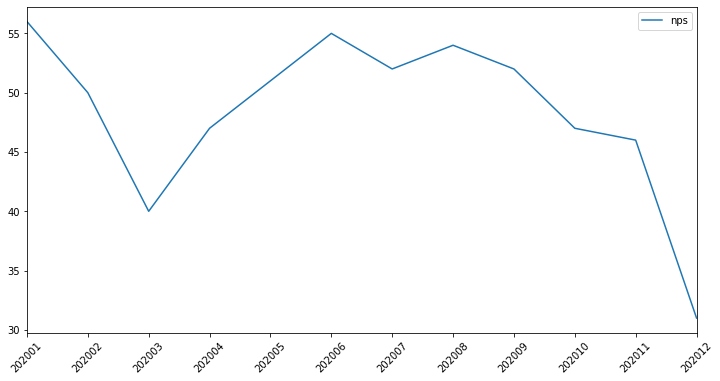

In [134]:
ax = nps.reset_index().plot(kind='line',x='yearmonth',y='nps',figsize=(12,6))
ax.set_xticks(nps.index)
ax.set_xticklabels(nps.index,rotation=45)
ax.axes.get_xaxis().set_label_text("")

To improve NPS, we must improve customer satisfaction. Begin by surveying its customers to get feedback and gain some understanding as to what's driving this apparent insatisfaction. In fact, it's standard practice in NPS surveys to have a freeform text box where customers can share their feedback with us

---

Churn rate is the percentage of customers that churned in a given time period.

$$\frac{Churned  Customers}{Total  Customers}$$

|column|desc|
|---|---|
|id|The subscription ID; a customer can appear multiple times in this dataset by virtue of having multiple subscriptions instead of a continuous one|
|customer_id|The customer's ID|
|end_date|The actual (if in the past) or estimated (if in the future) end date of the subscription|
|start_date|The subscription start date|
|subscription_period|Specifies whether it is a monthly or annual subscription|
|price|The price|

The number of customers can change throughout the month. Potentially even everyday, and depending on implementation details, it can change from one minute to the other. So how do we decide on the denominator? 

* The number of customers at the beginning of the time period.
* The mean between the number of customers at the beginning of the time period and at the end of the same period.
* The average throughout the time period — for example, if the chosen time frame is a week, sum the number of customers from Monday through Sunday and divide by seven.

In [140]:
subs = pd.read_csv('muscle_labs.csv',parse_dates=['end_date','start_date'])
subs.head()

,id,customer_id,end_date,start_date,subscription_period,price
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500


In [143]:
subs['churn_month'] = subs['end_date'].apply(lambda x:x.strftime('%Y%m')).astype(int)

In [178]:
# monthly_churn = 
monthly_churn = pd.DataFrame(subs.groupby('churn_month')['churn_month'].\
            count())
monthly_churn.columns = ['total_churned']

In [181]:
monthly_churn = monthly_churn.reset_index()

**Data Wrangling**

In [182]:
subs.start_date.min()

Timestamp('2011-01-05 13:55:00')

In [185]:
monthly_churn.churn_month.min()

201103

In [189]:
years = list(range(2011,2015))

In [188]:
months = list(range(1,13))

In [190]:
yearmonths = [y*100+m for y in years for m in months]

In [193]:
yearmonths = yearmonths[:-1]

In [202]:
churn = pd.DataFrame({'yearmonth':yearmonths})
churn.head()

,yearmonth
0,201101
1,201102
2,201103
3,201104
4,201105


In [200]:
monthly_churn.head()

,churn_month,total_churned
0,201103,8
1,201104,16
2,201105,29
3,201106,27
4,201107,37


In [203]:
churn = pd.merge(churn,monthly_churn,\
        how='left',\
        left_on='yearmonth',\
        right_on='churn_month')

In [207]:
churn.fillna(0,inplace=True)

In [209]:
churn['churn_month'] = churn['churn_month'].astype('int')
churn['total_churned'] = churn['total_churned'].astype('int')

In [210]:
churn.head()

,yearmonth,churn_month,total_churned
0,201101,0,0
1,201102,0,0
2,201103,201103,8
3,201104,201104,16
4,201105,201105,29


In [218]:
def get_customers(yearmonth):
    year = yearmonth//100
    month = yearmonth-year*100
    date = dt.datetime(year, month, 1)
    
    return ((subs["start_date"] < date) & (date <= subs["end_date"])).sum()

churn["total_customers"] = churn["yearmonth"].apply(get_customers)
churn["churn_rate"] = churn["total_churned"] / churn["total_customers"]
churn["yearmonth"] = churn["yearmonth"].astype(str)

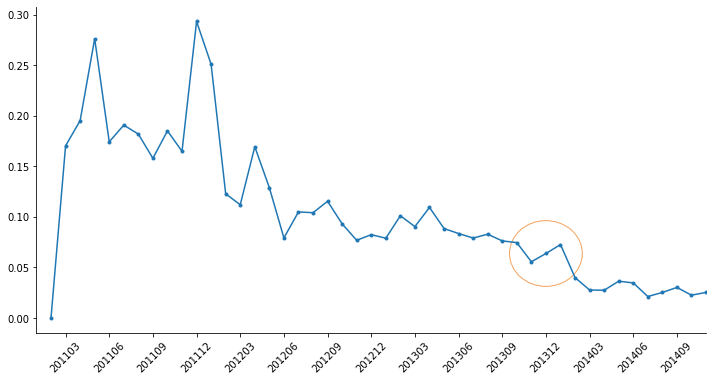

In [219]:
arange = __import__("numpy").arange
Ellipse = __import__("matplotlib").patches.Ellipse
ax = churn.plot(x="yearmonth", y="churn_rate", figsize=(12,6), rot=45, marker=".")
start, end = ax.get_xlim()
ax.get_xticks()
ax.set_xticks(arange(2, end, 3))
ax.set_xticklabels(yearmonths[2::3])
circle = Ellipse((35, churn.loc[churn.yearmonth == "201312", "churn_rate"].iloc[0]),
                 5, 0.065, color='sandybrown', fill=False
                   )
ax.add_artist(circle)
ax.xaxis.label.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()